# 딥러닝으로 이미지 분류 문제를 해결하기

딥러닝 모델을 구성하여 이미지 문류 문제의 성능은 어떨까? 확인해 보자. 그리고, 딥러닝으로 이미지 분류 모델 성능을 개선하기 위한 방법은 무엇이 있을까 고민해보자.

## 데이터 수집 및 전처리
CIFAR-10 데이터 세트(https://www.cs.toronto.edu/~kriz/cifar.html)는 컴퓨터 비전에서 오랜 역사를 지닌 데이터이다.

사이트를 방문해서 이미지 데이터를 확인해보자.

In [ ]:
# 이미지데이터의 화소(가로 * 세로) 는 몇인가요?: 32x32 colour images

# 이미지데이터는 총 몇개이며, 훈련용, 테스트용 각각 몇장으로 구성되었나요? : 60000 images | 50000 training images and 10000 test images.

# 몇개의 클래스로 구분하고 있나요?: 10 classes

# 클래스의 이름을 전부 나열해보세요: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck


In [ ]:
import numpy as np
from tensorflow import keras

# 이미지 데이터 불러오는 함수 ( cifar10 가져오기 )
from keras.datasets import cifar10

# 불러온 데이터의 훈련용 데이터 테스트용 데이터 문제 정답 나눠 저장
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 훈련용 데이터 문제 형태랑 저장된 데이터 타입(int8형 0 ~ 255 <- RGB 범위) 출력
print(x_train.shape, x_train.dtype)
# 훈련용 데이터 정답 형태랑 저장된 데이터 타입(int8형 0 ~ 255 <- RGB 범위) 출력
print(y_train.shape, y_train.dtype)
# 테스트용 데이터 문제 형태랑 저장된 데이터 타입(int8형 0 ~ 255 <- RGB 범위) 출력
print(x_test.shape, x_test.dtype)
# 테스트용 데이터 정답 형태랑 저장된 데이터 타입(int8형 0 ~ 255 <- RGB 범위) 출력
print(y_test.shape, y_test.dtype)

(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) uint8


### 이제, 4개의 샘플 데이터를 이미지로 출력해 보자.
- matplotlib.pyplot의 imshow() 함수를 사용하면 벡터 형태의 데이터를 이미지로 출
력할 수 있다.

In [ ]:
# 4개의 샘플 데이터 출력한 결과를 보고 각각 어떤 이미지인지 알아보자.
# 첫번째: frog
# 두번째: automobile
# 세번째: ship
# 네번째: horse

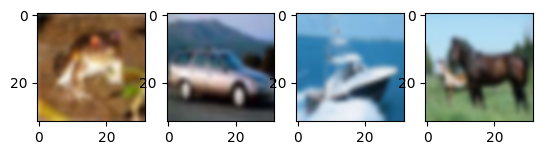

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# x_train의 이미지 샘플 출력해 보기
plt.subplot(141)
plt.imshow(x_train[0], interpolation = "bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation = "bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation = "bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation = "bicubic")
plt.grid(False)
plt.show()

### 데이터 전처리
(1) 데이터 정규화 : 값이 들쭉날쭉한 데이터들을 (0.0 ~ 1.0)로 바꾸는 전처리

In [ ]:
# 데이터 정규화하기 전, 이미지의 각 픽셀값의 범위를 확인하세요.
x_train.min(), x_train.max()

(0, 255)

In [ ]:
# 데이터를 정규화하기 위해 어떤 숫자로 나눠줘야할까 생각해보세요.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# 정규화가 잘 되었는지 이미지의 범위를 확인해보세요.

x_train.min(), x_train.max()

(0.0, 1.0)

(2) 원-핫 인코딩: 딥러닝 전 저장된 정수 데이터 들을 0과 1을 사용하여 위치를 나타내는 저장형태로 바꾸어 딥러닝이 쉽게 만드는 작업 ex) 3 2 1 -> 0 0 1 | 0 1 0 | 1 0 0


원-핫 인코딩하기 위해서  keras.utils의 to_categorical() 모듈을 사용해 보자.

In [ ]:
# 원-핫 인코딩하기 전의 값을 확인해보세요. 왜 이런 값이 나왔을까 이유를 생각해보세요. : class 가 10개기 때문에.
y_train.min(), y_train.max(), y_test.min(), y_test.max()

(0, 9, 0, 9)

In [ ]:
# 원-핫인코딩 하기 전의 결과.
print(y_train.shape, y_test.shape)

(50000, 1) (10000, 1)


In [ ]:
# 훈련용 데이터 0 ~ 3번 정답의 class 각각 frog, truck, truck, deer
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [ ]:
# 테스트 데이터 0 ~ 3번 정답의 class 각각 cat, ship, ship, airplane
y_test[:4]

array([[3],
       [8],
       [8],
       [0]], dtype=uint8)

In [ ]:
from keras.utils import to_categorical

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# 원-핫 인코딩의 결과를 실행하기 전에 먼저 예상해보세요.
# [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
# [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
print(y_train[:4])

# 훈련용 데이터의 정답 형태가 1 -> 10개로 바뀜
print(print(y_train.shape, y_train.dtype))

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(50000, 10) float32
None


#### 완전 연결망 모델 구성

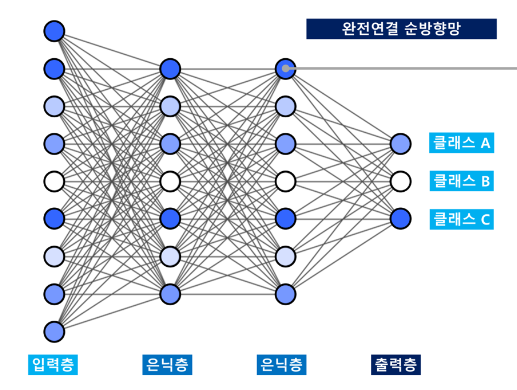

In [ ]:
# 학습에 사용하기 위한 변수를 설정해보자.
# (1-1) 입력층에 주입해야하는 데이터는 몇차원이어야 하는가?: 1차원

# (1-2) 입력층의 노드 수는 몇?: 32 * 32 * 3개 (3,072개)

# (2-1) 출력층으로 분류하고자 하는 클래스의 수는 몇 개인가?: 10개

# (2-2) 출력층의 노드 수는 몇?: 10개


In [ ]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [ ]:
# num_pixels = 32 * 32 * 3
num_pixels = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]

# num_classes = 10
num_classes = y_train.shape[1]


완전 연결 신경망의 첫 층은 3차원 데이터를 1차원 형태로 바꾸는 Flatten() 층이다.
이후, 점차 은닉 층의 노드 수를 줄여나가다가 마지막 출력 층에서 노드의 개수를 클래
스의 수로 설정하여 모델을 구성한다.
네트워크 구성과 컴파일하는 기능을 fully_connected_model() 함수로 구현하며, 함
수 호출을 통하여 실제 모델을 생성한다.








In [ ]:
# 신경망 불러오는 라이브러리
from keras.models import Sequential
from keras.layers import Flatten, Dense

# 완전 연결 신경망 모델 구성
def fully_connected_model():
    # 선형으로 연결하여 구성되는 신경망 모델 선언
    model = Sequential()
    # 데이터 입력층 입력 전 3 차원 데이터를 1차원 형태로 바꾸는 층이다.
    model.add(Flatten())

    # 신경망의 입력층, 영향력을 확인하여 전달하기 위해 activation 을 넣었으며 이는 relu로 만들어져 있다. relu 는 x = y 그래프로 sigmoid 처럼 데이터 손실이 없다.
    model.add(Dense(num_pixels, input_dim = num_pixels, activation ='relu'))

    # 층 4개 추가로 전부 relu 구성으로 되어있어 데이터 손실 없이 층을 넘어가고 범위를 좁힌다.
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))

    # 마지막 출력층을 구성한다. 총 10개의 클래스로 나오게 되며 이번에는 softmax로 구성되어 있는데,
    # softmax는 세 개 이상으로 분류하는 다중 클래스 분류에서 사용되는 활성화 함수로 분류가 완료된 각 클래스에 정답일 것 같은 확률을 알려준다.
    model.add(Dense(num_classes, activation = 'softmax'))

    # 모델 컴파일
    # loss에는 다중 클래스 분류에 쓰이는 loss를 사용하였고, 최적화는 adam 사용으로 진행하였고, 정확도의 정보를 얻기 위해 accuracy도 넣었다.
    model.compile(loss = 'categorical_crossentropy',  optimizer = 'adam',  metrics = ['accuracy'])

    return model

# 함수 호출을 통한 모델 생성
model1 = fully_connected_model()

### 완전 연결망 모델 학습
fit() 함수를 이용하여 모델 학습을 시작한다. 학습 데이터로 x_train, 학습 레이블로
y_test를 사용한다. 매 세대마다 검증 데이터로 손실값과 정확도를 확인하는데, 검증 데
이터로 x_test, y_test를 사용한다.

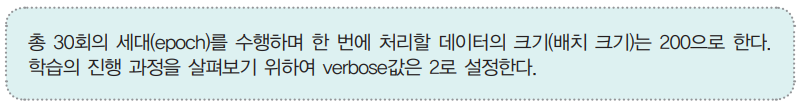

#### 모델학습에 전달하는 각 인수가 무엇을 의미하는지 확인하고 위의 조건에 맞게 학습시켜보세요.



In [ ]:
# 모델 학습 진행하기 - 모델학습에 전달하는 각 인수가 무엇을 의미하는지 적어보세요.
history1 = model1.fit(x_train,                                 # 훈련용 데이터 문제 입력
                      y_train,                                 # 훈련용 데이터 정답 입력
                      epochs =   30 ,                          # 30회 반복 <- 한번의 학습으로는 정확도도 낮고 피드백이 안되어 개선이 안된다.
                      batch_size = 200 ,                       # 데이터 200개씩 묶어 처리 <- 하나씩 처리할 경우 50000개를 전부 처리해야 되기 때문에 묶어서 처리.
                      verbose = 2 ,                            # 진행과정을 확인하기 위하여 2 설정  <- 0 : 출력 X, 1 : 자세히 출력, 2 : 함축적인 정보만 출력
                      validation_data = (x_test, y_test))      # 학습된 모델에 test를 진행하기 위한 문제와 정답 입력

Epoch 1/30
250/250 - 5s - loss: 2.0475 - accuracy: 0.2454 - val_loss: 1.8600 - val_accuracy: 0.3335 - 5s/epoch - 20ms/step
Epoch 2/30
250/250 - 2s - loss: 1.7469 - accuracy: 0.3679 - val_loss: 1.7049 - val_accuracy: 0.3749 - 2s/epoch - 9ms/step
Epoch 3/30
250/250 - 2s - loss: 1.6562 - accuracy: 0.4026 - val_loss: 1.6197 - val_accuracy: 0.4166 - 2s/epoch - 7ms/step
Epoch 4/30
250/250 - 2s - loss: 1.5987 - accuracy: 0.4254 - val_loss: 1.5944 - val_accuracy: 0.4307 - 2s/epoch - 8ms/step
Epoch 5/30
250/250 - 2s - loss: 1.5271 - accuracy: 0.4532 - val_loss: 1.5477 - val_accuracy: 0.4499 - 2s/epoch - 7ms/step
Epoch 6/30
250/250 - 2s - loss: 1.4821 - accuracy: 0.4682 - val_loss: 1.4731 - val_accuracy: 0.4722 - 2s/epoch - 7ms/step
Epoch 7/30
250/250 - 2s - loss: 1.4387 - accuracy: 0.4855 - val_loss: 1.4659 - val_accuracy: 0.4719 - 2s/epoch - 7ms/step
Epoch 8/30
250/250 - 2s - loss: 1.3972 - accuracy: 0.4996 - val_loss: 1.4451 - val_accuracy: 0.4844 - 2s/epoch - 8ms/step
Epoch 9/30
250/250 - 2s

## 모델학습 결과값의 의미를 알아보세요. 각각의 결과값은 어떻게 변하고 있나요?
- loss: 훈련용 데이터 손실값, 손실값이 점점 0에 가까워지고 있다.
- accuracy: 훈련용 데이터 정확도, 정확도가 점점 1에 가까워지고 있다.
- val_loss: 테스트용 데이터 손실값, val_loss 가 점점 0에 가까워지고 있으나, 학습이 진행될 수록 손실값이 늘어나고 있다.
- vall_accuracy: 테스트요 데이터 정확도, val_accuracy 가 점점 1에 가까워지고 있다.

### 완전 연결망 모델 학습
model.fit()을 실행하여 학습 데이터와 검증 데이터의 각 손실값 추이를 관찰하였다.
이를 시각화하여 조금 더 쉽게 추이가 어떤지 관찰해 보자.

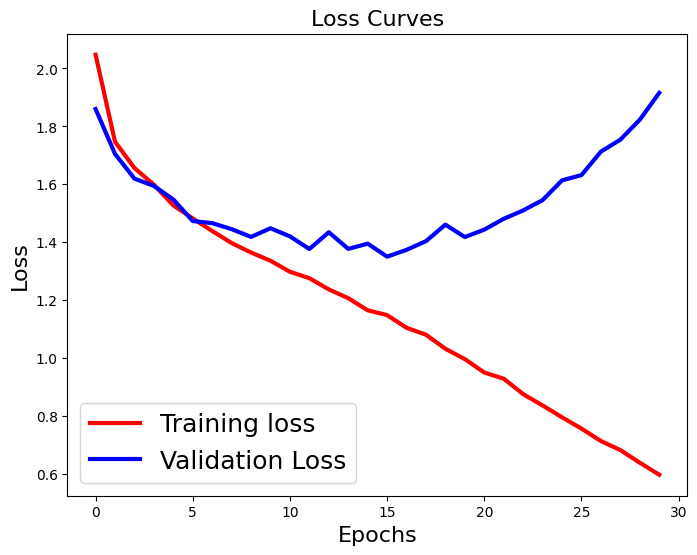

In [ ]:
def loss_graph(history):
    # 손실값 그래프 그리기
    plt.figure(figsize = [8,6])
    plt.plot(history.history['loss'],'r',linewidth = 3.0)
    plt.plot(history.history['val_loss'],'b',linewidth = 3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize = 18)
    plt.xlabel('Epochs',fontsize = 16)
    plt.ylabel('Loss',fontsize = 16)
    plt.title('Loss Curves',fontsize = 16)
# 손실값 그래프 그리기
loss_graph(history1)

# 위의 그래프 추이를 해석해서 이유를 작성해보세요.

In [ ]:
# 그래프를 해석해보세요.

#학습이 진행되며 훈련용 데이터의 loss값은 점점 0에 가까워 지지만 학습이 진행될 수록 오버피팅이 일어나기 때문에 테스트 데이터에 loss값은 어느 기점을 넘어서 점점 증가하는 추세로 변한다.
#(오버피팅) <- 훈련이 너무 반복하다 보니 신경망이 훈련용 데이터에 맞는 값만 반환하고 응용을 못하는 현상

In [ ]:
# socre 함수를 이용하여 완성된 모델의 점수를 확인 이 모델은 에러율이 49.19%다.
def evaluate_model(model):
    scores = model.evaluate(x_test, y_test, verbose = 0)
    print('모델 에러율: %.2f%%' % (100 - scores[1] * 100))
evaluate_model(model1)

모델 에러율: 49.19%


위 결과를 확인해 보면, 완전 연결망의 성능이 생각보다 좋지 않게 나온 것을 알 수
있다. 그 이유는 무엇일까?

이미지 데이터에서는 일반적으로 상하좌우 픽셀 간의 매우 높은 상관 관계가 존재하기 때문에 이미지를 벡터화하는 과정에서 막대한 정보 손실이 발생한다.

완전 연결망의 Dense 층은 입력 특성 공간에 있는 전역 패턴(global patterns)을 학습하기 때문이다.

# 다음차시 예고:

합성곱 신경망(CNN)은 이미지의 형태를 보존하도록 행렬 형태의 데이터를 입
력받기 때문에 이미지를 벡터화하는 과정에서 발생하는 정보 손실을 방지할 수 있다.

이미지는 전역 패턴을 학습하는 것보다 지역 패턴을 학습하여 동일한 형상이 다른 위
치에 있더라도 이를 인식하는 것이 중요하다.

예를 들어, 고양이가 자고 있는 이미지이든, 걷고 있는 이미지이든 ‘고양이 귀’의 패턴은 지역적으로 일정하다.

합성곱 층(Conv2D)은 지역 패턴(local patterns)을 학습하므
로 이미지 인식에 최적화된 성능을 보인다.

합성곱 신경망은 완전 연결망과 대비하여 문제를 어떻게 해결할 수 있을지 살펴보자.

오늘의 총 정리

32  x 32 RGB 컬러 이미지를 신경망에 넣기 위한 노드 갯수는 32 x 32 x 3 이라는 것을 알았다.
\
신경망의 오버피팅이 일어나기 전까지 학습을 하면 에러율이 낮은 모델을 만들 수 있다는 것을 알았다.
\
오늘 만든 완전 연결망의 Dense 층을 이용한 신경망은 컬러이미지 분류에 올바르지 않은 방법이라는 것을 알았다.